In [42]:
import pandas as pd
from pathlib import Path

### Main indicators

In [73]:
data_files = [
    ("1_estat_ilc_li02_filtered_en.csv", "At-risk-of-poverty rate, 15-29 years of age"),
    ("2_estat_ilc_peps01n_filtered_en.csv", "Persons at risk of poverty or social exclusion, 15-29 years"),
    ("3_estat_ilc_mdsd11_filtered_en.csv", "Severe material and social deprivation rate, 16-29 years of age"),
    ("4_estat_ilc_lvhl11_filtered_en.csv", "Persons living in households with very low work intensity")
]

In [43]:
base_path = Path("data/")

In [103]:
countries = {
    "Poland": "red",
    "Italy": "green",
    "Germany": "black",
    "Spain": "yellow",
    "France": "blue"
}

In [104]:
master_df = None
for (fname, title) in data_files:
    path = base_path / fname
    df = pd.read_csv(path)
    for country in countries.keys():
        assert country in set(df['geo'].value_counts().index)
    sub_df = df.loc[df['geo'].isin(countries)].sort_values(by='TIME_PERIOD')[['geo', 'TIME_PERIOD', 'OBS_VALUE']].rename(columns={
        'geo': 'Country',
        'TIME_PERIOD': 'Year',
        'OBS_VALUE': title
    }).copy()
    if master_df is None:
        master_df = sub_df
    else:
        master_df = master_df.merge(sub_df, on=['Country', 'Year'])

In [105]:
master_df.head(1)

,Country,Year,"At-risk-of-poverty rate, 15-29 years of age","Persons at risk of poverty or social exclusion, 15-29 years","Severe material and social deprivation rate, 16-29 years of age",Persons living in households with very low work intensity
0,France,2015,13.6,18.4,5.4,8.5


In [106]:
assert master_df.isna().any().sum() == 0

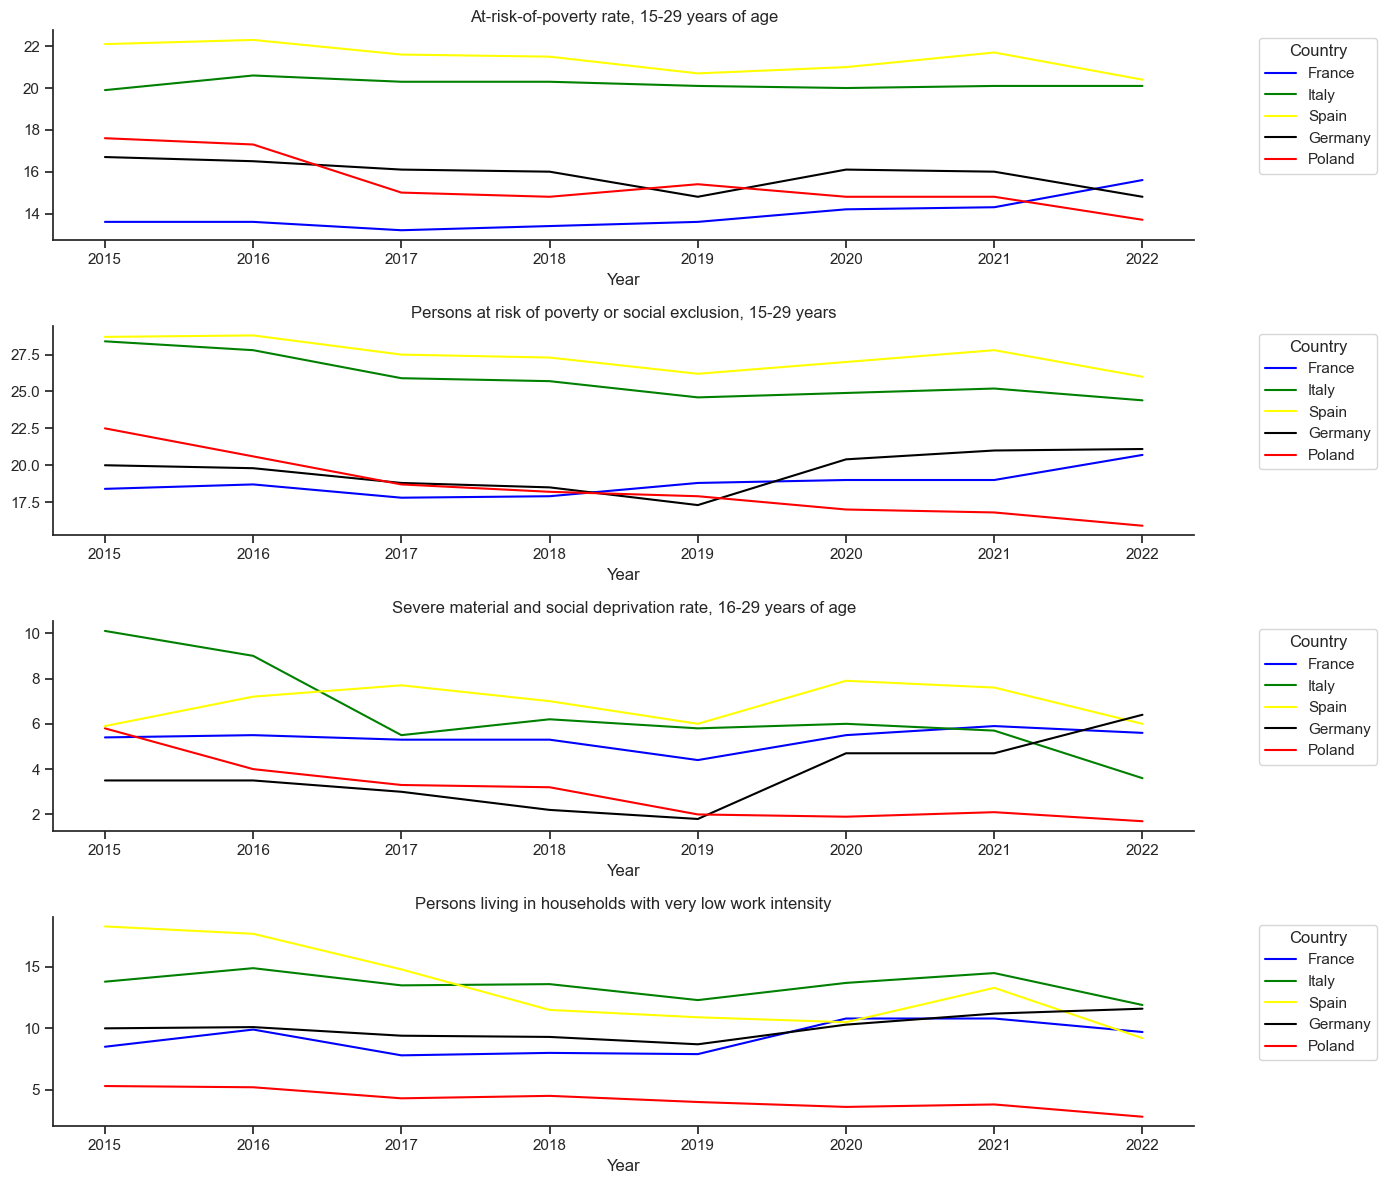

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="ticks", palette="pastel")

fig, axes = plt.subplots(4, 1, figsize=(14, 12))

columns = master_df.columns[2:]  # Exclude 'Country' and 'Year'

for (col, ax) in zip(columns, axes):
    sns.lineplot(
        data=master_df,
        x="Year",
        y=col,
        hue="Country",
        palette=countries,
        ax=ax
    )
    sns.despine(ax=ax)
    ax.set_title(col)
    ax.set_ylabel("")
    ax.legend(title="Country", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()

In [111]:
fig.savefig('main_indicators.png')

### Unemploymnent rate

In [113]:
df = pd.read_csv("data/5_estat_une_rt_m_filtered_en.csv")
df.head()

,DATAFLOW,LAST UPDATE,freq,s_adj,age,unit,sex,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:UNE_RT_M(1.0),19/12/24 11:00:00,Monthly,"Seasonally adjusted data, not calendar adjuste...",Less than 25 years,Percentage of population in the labour force,Total,Austria,2020-03,10.4,NaN
1,ESTAT:UNE_RT_M(1.0),19/12/24 11:00:00,Monthly,"Seasonally adjusted data, not calendar adjuste...",Less than 25 years,Percentage of population in the labour force,Total,Austria,2020-04,14.8,NaN
2,ESTAT:UNE_RT_M(1.0),19/12/24 11:00:00,Monthly,"Seasonally adjusted data, not calendar adjuste...",Less than 25 years,Percentage of population in the labour force,Total,Austria,2020-05,15.2,NaN
3,ESTAT:UNE_RT_M(1.0),19/12/24 11:00:00,Monthly,"Seasonally adjusted data, not calendar adjuste...",Less than 25 years,Percentage of population in the labour force,Total,Austria,2020-06,12.6,NaN
4,ESTAT:UNE_RT_M(1.0),19/12/24 11:00:00,Monthly,"Seasonally adjusted data, not calendar adjuste...",Less than 25 years,Percentage of population in the labour force,Total,Austria,2020-07,12.8,NaN


In [116]:
df = df.loc[df['geo'].isin(countries.keys()), ['geo', 'TIME_PERIOD', 'OBS_VALUE']].rename(columns={
    'geo': 'Country',
    'OBS_VALUE': 'Unemployment Rate less than 25 years old'
})

In [121]:
df['TIME_PERIOD'] = pd.to_datetime(df['TIME_PERIOD'])

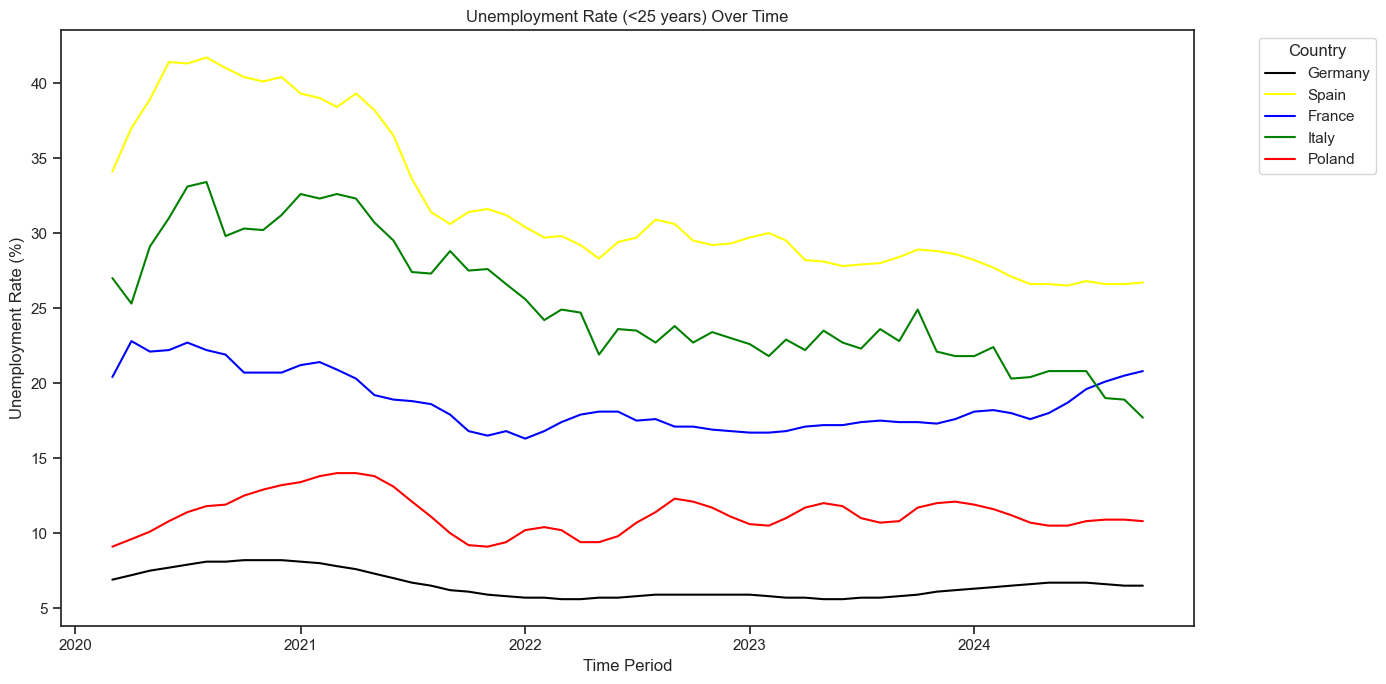

In [122]:
fig, ax = plt.subplots(figsize=(14, 7))

sns.lineplot(
    data=df,
    x="TIME_PERIOD",
    y="Unemployment Rate less than 25 years old",
    hue="Country",
    palette=palette,
    ax=ax
)

ax.set_title("Unemployment Rate (<25 years) Over Time")
ax.set_xlabel("Time Period")
ax.set_ylabel("Unemployment Rate (%)")
ax.legend(title="Country", bbox_to_anchor=(1.05, 1), loc="upper left")

fig.tight_layout()

In [123]:
fig.savefig("unemployment_rate.png")